The [ESRGAN model](https://www.kaggle.com/models/kaggle/esrgan-tf2/tensorFlow2/esrgan-tf2/1?tfhub-redirect=true) is sourced from [TensorFlow Hub](https://www.tensorflow.org/hub/tutorials/image_enhancing).

To use this model, you need to install TensorFlow Hub using the following command:

pip install tensorflow_hub

### Imports

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import random

### Defining Helper Functions

The following functions are used to preprocess the image, downscale it, and display the images.

In [2]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = np.array(img)
    hr_image = tf.convert_to_tensor(img, dtype=tf.float32)

    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    return tf.expand_dims(hr_image, axis=0)

def downscale_image(hr_image, factor=4):
    hr_image = tf.squeeze(hr_image)
    img = Image.fromarray(tf.cast(hr_image, tf.uint8).numpy())

    new_size = (img.width // factor, img.height // factor)
    img = img.resize(new_size, Image.BICUBIC)

    lr_image = tf.convert_to_tensor(np.array(img), dtype=tf.float32)
    return tf.expand_dims(lr_image, axis=0)

def show(img_tensor, title):
    img = tf.clip_by_value(tf.squeeze(img_tensor), 0, 255)
    img = Image.fromarray(tf.cast(img, tf.uint8).numpy())
    plt.imshow(img)
    plt.title(title, fontsize=15)
    plt.axis("off")

def get_model(model_type="esrgan"):
    if model_type == "esrgan":
        model_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
    else:
        raise ValueError(f"Unknown model: {model_type}")

    print(f"Loading model: {model_path}")
    return hub.load(model_path)

### ESRGAN model

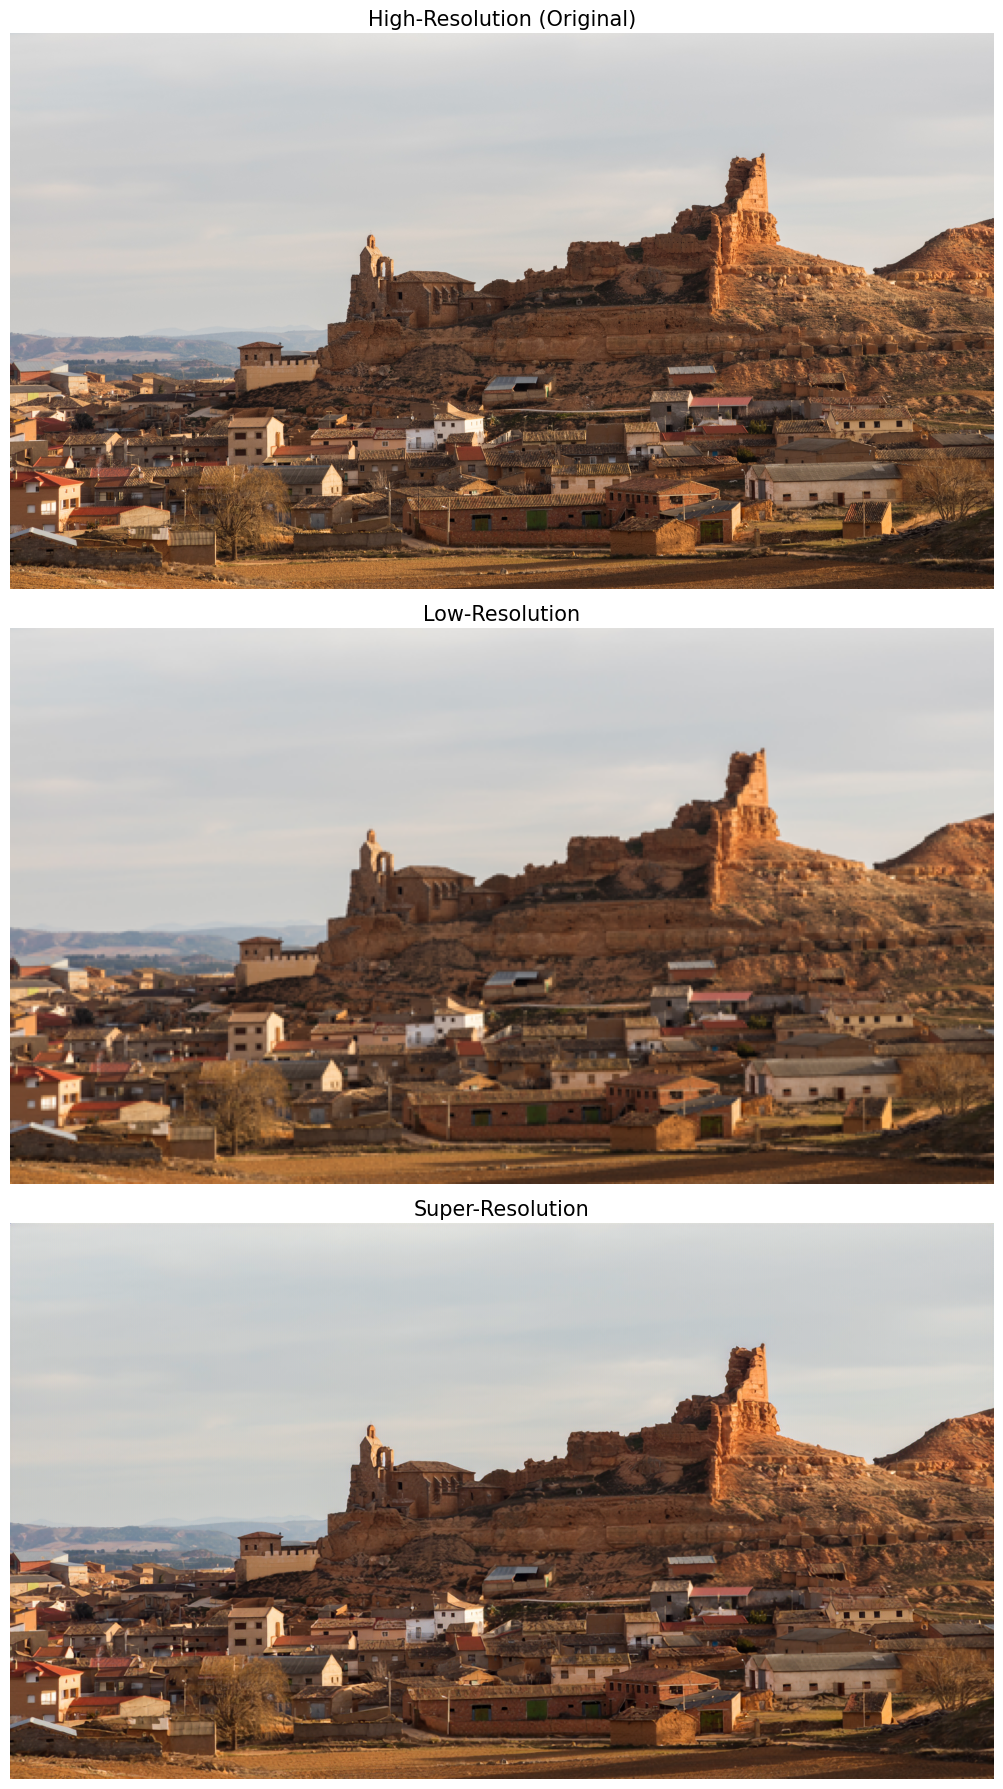

In [11]:
model = hub.load(model_path)

test_dir = "../loppuprojekti/data/DIV2K_test_HR"
image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(".png")]
image_path = os.path.join(test_dir, random.choice(image_files))

hr_image = preprocess_image(image_path)
lr_image = downscale_image(hr_image, factor=4)

sr_image = model(lr_image)

plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
show(hr_image, "High-Resolution (Original)")

plt.subplot(3, 1, 2)
show(lr_image, "Low-Resolution")

plt.subplot(3, 1, 3)
show(sr_image, "Super-Resolution")

plt.tight_layout()
plt.show()